### Project Description
Estimate the value of houses in Ames, Iowa, using 79 explanatory variables. The dataset is fairly small, with only 1460 training samples. The 79 features in the dataset are a mix of categorical and numerical features, and leave a lot of room for feature engineering.

This notebook merely preprocesses the data. 
Note: This is the first most basic preprocessing version used for models tested in chapter 1 and 2. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore

In [2]:
# set keggle on True if you want data for keggle competition
# else leave on keggle on False for normal data
keggle = False

In [3]:
# import data
data = pd.read_csv('data/AmesHousing.csv')
test_data = pd.read_csv('data/test.csv')
train_data = pd.read_csv('data/train.csv')

data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


### OVERVIEW

There are multiple types of variables. Integers, floats, strings, NaN's. Use df.info() to gain detailed insight.


In [4]:
# display data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

There are 2930 entries, numbered 0 to 2929, with **81 different features**. The **target feature** is 'SalePrice'. 

Out of all the columns there are several that have missing values. For instance, 'Alley', 'Pool QC', 'Fence', and 'Misc Feature'. These need to be fixed. 

### Cleaning the data

In [5]:
# drop column 'Order' since it is unique for each house
clean_data = data.drop('Order', axis=1)

### Dealing with categorical features who are classified as numeric features

Some features in the dataset are stored as numeric data, but are actually categorical features. They are hence converted to string values, so they get the same treatment as categorical features.

The only feature that is wrongly classified is: MS SubClass (the building class)

In [6]:
clean_data["MS SubClass"] = clean_data["MS SubClass"].apply(str)

#### Changing ordinal categorical features to numerical features

1. A function is made that can change ordinal categorical data to numerical features
1. Dictonaries are created with the categories within features as keys and the corresponding numerical value as dictonary value
3. Lists are created with the features that need to be replaced 


In [7]:
def ordinal_to_num(lists, dicts):
    '''
    Takes a list and a dictonary. Replaces the categories in a feature to a nummerical.
    '''
    # loop over the features in the list
    for feature in lists:
        
        # replace the categories for the feature with the value of the dictonary
        if feature in clean_data:
            clean_data[feature] = clean_data[feature].map(dicts)

In [8]:
# create the list and dictonary for the most common categories
common_ordinal_dict = {'Ex':5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
common_list_num_cats = ['Exter Qual', 'Exter Cond', 'Bsmt Cond', 'Heating QC', 'Kitchen Qual', 'Fireplace Qu', 'Garage Qual', 'Garage Cond', 'Bsmt Qual', 'Bsmt Qual']

# change these to numerical features
ordinal_to_num(common_list_num_cats, common_ordinal_dict)

# create list and dict for Pool QC 
PoolQC_list = ['Pool QC']
PoolQC_dict = {'Ex':4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'NA': 0}

# execute the change for Pool QC
ordinal_to_num(PoolQC_list, PoolQC_dict)

# create list and dict for Land Slope
slope_list = ['Land Slope']
slope_dict = {'Gtl': 1, 'Mod': 2, 'Sev': 3}

# execute the change for Land slope
ordinal_to_num(slope_list, slope_dict)

# create list and dict for Bsmt Exposure
Bsmt_exposure_list = ['Bsmt Exposure']
Bsmt_exposure_dict = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0}

# execute the change for Bsmt Exposure
ordinal_to_num(Bsmt_exposure_list, Bsmt_exposure_dict)

# create list and dict of the types of finished basement
bsmtFin_list = ['BsmtFin Type 1', 'BsmtFin Type 2']
bsmtFin_dict = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0}

# create list and dict of the types of unfinished basement
ordinal_to_num(bsmtFin_list, bsmtFin_dict)

display(clean_data)

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [9]:
# get overview of missing values
clean_data.isnull()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2926,False,False,False,True,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2927,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2928,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


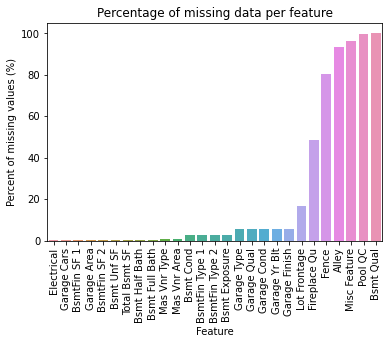

In [10]:
def missing_data(df):
    ''' Calculates and returns the percentage of missing data per feature. '''
    percentage = 100 * df.isnull().sum() / len(df)
    
    # sort in ascending order
    return percentage[percentage > 0].sort_values()

percent_missing_data = missing_data(clean_data)

sns.barplot(x = percent_missing_data.index, y = percent_missing_data)
plt.title('Percentage of missing data per feature')
plt.xlabel('Feature')
plt.ylabel('Percent of missing values (%)')
plt.xticks(rotation = 90)
plt.show()


### Chosing how to deal with missing values

There are the following options/steps:

1. Delete each row (sample) that contains a missing value
2. Delete the whole column (feature) containing the missing values
3. Replace the missing values with some other value

**Option 1**

Delete each row (sample) that contains a missing value.

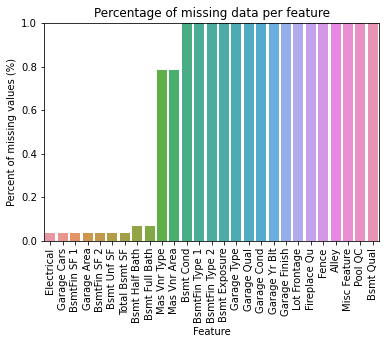

In [11]:
# check which rows to drop, depending on a treshold of 1% (zoom in)
sns.barplot(x = percent_missing_data.index, y = percent_missing_data)
plt.xticks(rotation = 90)
plt.ylim(0 , 1)

# set labels
plt.title('Percentage of missing data per feature')
plt.xlabel('Feature')
plt.ylabel('Percent of missing values (%)')
plt.show()

# drop rows that miss less than 1% of the data
drop_rows = percent_missing_data[percent_missing_data <= 1]
drop_rows = drop_rows.index.tolist()

if keggle == False:
    clean_data = clean_data.dropna(axis = 'index', subset = drop_rows)

**Option 2**

Delete the whole column (feature) containing the missing values

In [12]:
# select the features with more than 20% data missing
drop_features = percent_missing_data[percent_missing_data >= 20]
drop_features = drop_features.index.tolist()

# remove those features
clean_data = clean_data.drop(drop_features, axis = 1)

**Option 3**

Replace the missing values with some other value. For **categorical data**, replace the missing value with 'none'.
For **numerical data**, replace the missing value with the average value of that feature (in general). 

First, single out the features that have missing values. 

In [13]:
# select features that have missing values between 1 and 20 percent missing data
discuss_features = percent_missing_data[np.logical_and(percent_missing_data > 1, percent_missing_data < 20)]
discuss_features = discuss_features.index.tolist()

print(f"The following features have missing values: {', '.join(discuss_features)}\n")

The following features have missing values: Bsmt Cond, BsmtFin Type 1, BsmtFin Type 2, Bsmt Exposure, Garage Type, Garage Qual, Garage Cond, Garage Yr Blt, Garage Finish, Lot Frontage



### Inspect each numeric feature seperately and decide how to best replace its missing values.

**1. Lot Frontage**

In [14]:
# compute means of lot frontage per neighborhood
lot_means = clean_data.groupby('Neighborhood')['Lot Frontage'].mean()

# replace missing values 
clean_data['Lot Frontage'] = clean_data.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))

# for GrHill use Timber mean since it is the closest
clean_data[clean_data['Neighborhood'] == 'GrnHill'] = clean_data[clean_data['Neighborhood'] == 'GrnHill'].fillna(lot_means['Timber'])

# for Landmrk use Old Town mean since it is the closes
clean_data[clean_data['Neighborhood'] == 'Landmrk'] = clean_data[clean_data['Neighborhood'] == 'Landmrk'].fillna(lot_means['OldTown'])

# remove lot frontage from features to be discussed
discuss_features.remove('Lot Frontage')

**Other?** TBD

In [15]:
# replace missing values
def replace_values(dataframe):
    '''
    Replaces the missing values in the dataframe. If the missing value is in a categorical feature, 
    we replace the value for a 'None' string. In this case, you can still use that feature. 
    For the numeric features, the missing values are replace with the average of that feature. 
    '''
    for feature in dataframe:
        # single out categorical features and replace missing value with none
        if clean_data.dtypes[feature] == object:
            clean_data[feature] = clean_data[feature].fillna('None')

        # single out numerical features and replace missing value with mean
        else: 
            clean_data[feature] = clean_data[feature].fillna(clean_data[feature].mean())
    
    return clean_data
        
# check if all missing values are replaced
clean_data = replace_values(clean_data)
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2903 entries, 0 to 2929
Data columns (total 75 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2903 non-null   int64  
 1   MS SubClass      2903 non-null   object 
 2   MS Zoning        2903 non-null   object 
 3   Lot Frontage     2903 non-null   float64
 4   Lot Area         2903 non-null   int64  
 5   Street           2903 non-null   object 
 6   Lot Shape        2903 non-null   object 
 7   Land Contour     2903 non-null   object 
 8   Utilities        2903 non-null   object 
 9   Lot Config       2903 non-null   object 
 10  Land Slope       2903 non-null   int64  
 11  Neighborhood     2903 non-null   object 
 12  Condition 1      2903 non-null   object 
 13  Condition 2      2903 non-null   object 
 14  Bldg Type        2903 non-null   object 
 15  House Style      2903 non-null   object 
 16  Overall Qual     2903 non-null   int64  
 17  Overall Cond  

## Create new features

**1. Price/square feet based on neighborhood**

In [16]:
# compute price per square feet and add to data frame 
clean_data['Price/SF'] = clean_data['SalePrice'] / clean_data['Gr Liv Area']

# compute average price per square feet per neighborhood
avg_price = clean_data.groupby('Neighborhood')['Price/SF'].mean()

# make dictionary from series
avg_price = avg_price.to_dict()

# replace values in price per sf column with average price per neighborhood
clean_data['Price/SF'] = clean_data['Neighborhood'].map(avg_price)

## Numerical feature selection

First, plot numerical features in relation to Sale Price.

In [17]:
max_price = clean_data['SalePrice'].max()
min_price = clean_data['SalePrice'].min()

# # plot numerical features
# for feature in clean_data:
#     if type(clean_data[feature][0]) != str:
#         sns.lmplot(x = feature, y = 'SalePrice', data = clean_data, line_kws={'color': 'red'})
#         plt.ylim(min_price, max_price)
#         plt.show()


### Select relevant numerical features based on correlation

Numerical features are selected based on their correlation with Sale Price and their respective correlations. The following values were used to determine a correlation.

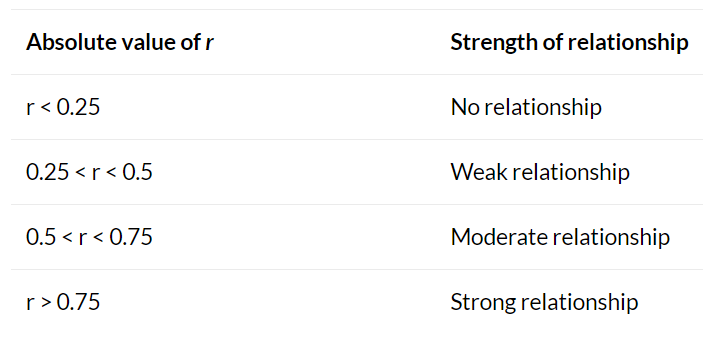



First, we will look at the correlation between each feature and sale price.

Then we will look whether the features are correlated to other features. When the correlation between two features is higher than 0.9, only one of the two features will be used.

In [18]:
# compute correlations for every feature with the feature sale price
price_correlations = abs(clean_data.corr()['SalePrice'].sort_values())

# determine features with weak, moderate, and strong correlations to sale price
weak_cor = price_correlations[price_correlations < 0.25]
moderate_cor = price_correlations[np.logical_and(price_correlations < 0.75, price_correlations > 0.5)]
strong_cor = price_correlations[price_correlations > 0.70] 

print(f'These features have a weak correlation to selling price\n{weak_cor}\n')
print(f'These features have a moderate correlation to selling price\n{moderate_cor}\n')
print(f'These features have a strong correlation to selling price\n{strong_cor}\n')

# determine relevant numerical features
relevant_num_features = price_correlations[price_correlations > 0.5].index
print(f"Relevant features are: {', '.join(relevant_num_features)}")

These features have a weak correlation to selling price
PID                0.244739
Enclosed Porch     0.130235
Kitchen AbvGr      0.120268
Overall Cond       0.099796
Low Qual Fin SF    0.037359
Bsmt Half Bath     0.034763
Yr Sold            0.027831
Misc Val           0.015326
BsmtFin Type 2     0.001286
BsmtFin SF 2       0.008022
Exter Cond         0.023103
Mo Sold            0.030556
3Ssn Porch         0.032927
Bsmt Cond          0.040708
Land Slope         0.067872
Pool Area          0.069103
Screen Porch       0.114262
Bedroom AbvGr      0.144928
Garage Cond        0.149836
Bsmt Unf SF        0.183368
Garage Qual        0.192922
Bsmt Exposure      0.231086
Name: SalePrice, dtype: float64

These features have a moderate correlation to selling price
Mas Vnr Area      0.508606
Garage Yr Blt     0.514897
Year Remod/Add    0.532265
Full Bath         0.546100
Year Built        0.558468
1st Flr SF        0.625499
Total Bsmt SF     0.634647
Garage Area       0.639161
Garage Cars       0

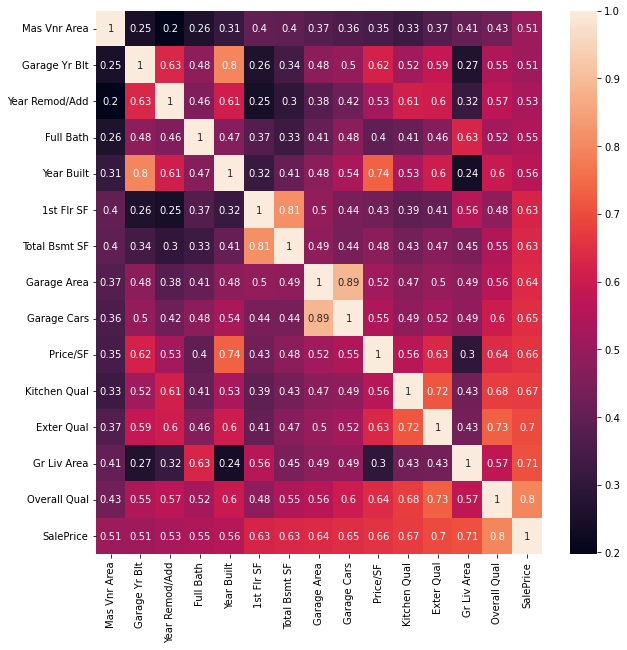

In [19]:
# creates a heatmap
correlation_features = clean_data[relevant_num_features].corr()
plt.figure(figsize = (10, 10))
sns.heatmap(correlation_features, annot = True)

plt.show()

As seen above, none of the preselected numerical features hold a correlation of 0.9 or higher with eachother. Therefore, all of the features will be selected.

In [20]:
# create dataframe with numerical data
num_data = clean_data[relevant_num_features]
num_data.head()

,Mas Vnr Area,Garage Yr Blt,Year Remod/Add,Full Bath,Year Built,1st Flr SF,Total Bsmt SF,Garage Area,Garage Cars,Price/SF,Kitchen Qual,Exter Qual,Gr Liv Area,Overall Qual,SalePrice
0,112.0,1960.0,1960,1,1960,1656,1080.0,528.0,2.0,116.655954,3,3,1656,6,215000
1,0.0,1961.0,1961,1,1961,896,882.0,730.0,1.0,116.655954,3,3,896,5,105000
2,108.0,1958.0,1958,1,1958,1329,1329.0,312.0,1.0,116.655954,4,3,1329,6,172000
3,0.0,1968.0,1968,2,1968,2110,2110.0,522.0,2.0,116.655954,5,4,2110,7,244000
4,0.0,1997.0,1998,2,1997,928,928.0,482.0,2.0,119.030660,3,3,1629,5,189900


## Categorical feature selection

In [21]:
# create dataframe with categorical data
cat_data = clean_data.select_dtypes(include = 'object')
cat_data.head()

,MS SubClass,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Neighborhood,Condition 1,Condition 2,...,Foundation,Heating,Central Air,Electrical,Functional,Garage Type,Garage Finish,Paved Drive,Sale Type,Sale Condition
0,20,RL,Pave,IR1,Lvl,AllPub,Corner,NAmes,Norm,Norm,...,CBlock,GasA,Y,SBrkr,Typ,Attchd,Fin,P,WD,Normal
1,20,RH,Pave,Reg,Lvl,AllPub,Inside,NAmes,Feedr,Norm,...,CBlock,GasA,Y,SBrkr,Typ,Attchd,Unf,Y,WD,Normal
2,20,RL,Pave,IR1,Lvl,AllPub,Corner,NAmes,Norm,Norm,...,CBlock,GasA,Y,SBrkr,Typ,Attchd,Unf,Y,WD,Normal
3,20,RL,Pave,Reg,Lvl,AllPub,Corner,NAmes,Norm,Norm,...,CBlock,GasA,Y,SBrkr,Typ,Attchd,Fin,Y,WD,Normal
4,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gilbert,Norm,Norm,...,PConc,GasA,Y,SBrkr,Typ,Attchd,Fin,Y,WD,Normal


In [22]:
# plot categorical features in relation to sale price
def barplots(cat_data):
    """
    Plots mainly categorical subfeatures as barplots
    """
    for feature in cat_data:
        sns.barplot(x = feature, y = 'SalePrice', data = clean_data)
        plt.xticks(rotation = 90)
        plt.ylim(min_price, max_price)
        plt.show()

# barplots(cat_data)

**Determine which categorical features have strongest influence on sale price**

Housing prices for these features should have at least 10% average difference between categories.

For computing the average difference between housing prices of categories per feature, we used some code from: https://docs.python.org/3/library/itertools.html


In [23]:
import operator
import itertools

def select_cat_features(cat_data, perc_diff = 0.05):
    """
    Store the most useful categorical features in a list and return that list.
    """
    
    relevant_cat_features = []

    treshold = (max_price - min_price) * perc_diff

    for feature in cat_data:
        # compute avereages for every feature for each subcategory
        avg_sp = clean_data.groupby(feature).mean().reset_index()

        # we only need the average sale price and convert it to a list
        sp_means = avg_sp['SalePrice'].tolist()

        # compute average difference between housing prices of categories per feature
        diffs = [abs(e[1] - e[0]) for e in itertools.permutations(sp_means, 2)]
        mean_diff = sum(diffs)/len(diffs)
        
        # determine if feature passes the treshold for influenceon housing price
        if mean_diff > treshold:
            print(feature, 'passed treshold')
            relevant_cat_features.append(feature)
            
    print("\ntreshold:", treshold)
            
    return relevant_cat_features

# remove irrelevant features from cat data
rel_cat_features = select_cat_features(cat_data)
print('the relevant categorical features are:', rel_cat_features)

cat_data = clean_data[rel_cat_features]

MS SubClass passed treshold
MS Zoning passed treshold
Street passed treshold
Land Contour passed treshold
Utilities passed treshold
Neighborhood passed treshold
Condition 1 passed treshold
Condition 2 passed treshold
House Style passed treshold
Roof Matl passed treshold
Exterior 1st passed treshold
Exterior 2nd passed treshold
Mas Vnr Type passed treshold
Foundation passed treshold
Heating passed treshold
Central Air passed treshold
Electrical passed treshold
Functional passed treshold
Garage Type passed treshold
Garage Finish passed treshold
Paved Drive passed treshold
Sale Type passed treshold
Sale Condition passed treshold

treshold: 37110.55
the relevant categorical features are: ['MS SubClass', 'MS Zoning', 'Street', 'Land Contour', 'Utilities', 'Neighborhood', 'Condition 1', 'Condition 2', 'House Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Heating', 'Central Air', 'Electrical', 'Functional', 'Garage Type', 'Garage Finish', 'Paved Drive', 'S

In [24]:
# # plot the relevent categorical features in relation to sale price
# barplots(rel_cat_features)

As you can see in the plots above, the variance of the categories are relatively high. This means that they're more useful for the regression model.

## Make dummies from categorical data

Taken from https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

In [25]:
# transform categorical features to one-hot-encoding
cat_data = pd.get_dummies(cat_data, drop_first=True)
cat_data.head()

,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0


## Rescaling data

In [26]:
# temporary remove target value Saleprice
# because these should not be rescaled
target = num_data['SalePrice']
num_data = num_data.drop(['SalePrice'], axis=1)

# store houses unique ID's in seperate series
ID = clean_data['PID']

# transform Sale Price in log Sale Price
target = np.log10(target)

# feature scale numerical data using zscore 
# note that we do not want to normalize our one-hot encoded data as those are already within [0,1] range
# source: "https://stackoverflow.com/a/41713622"
num_data = num_data.apply(zscore)

In [27]:
# merge categorical and numerical dataframe
num_data = pd.concat([num_data, target, ID], axis = 1)
clean_data = pd.concat([cat_data, num_data], axis = 1)

# display ditribution of data
display(clean_data.describe())

,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,Total Bsmt SF,Garage Area,Garage Cars,Price/SF,Kitchen Qual,Exter Qual,Gr Liv Area,Overall Qual,SalePrice,PID
count,2903.000000,2903.000000,2903.000000,2903.000000,2903.000000,2903.000000,2903.000000,2903.000000,2903.000000,2903.000000,...,2.903000e+03,2.903000e+03,2.903000e+03,2.903000e+03,2.903000e+03,2.903000e+03,2.903000e+03,2.903000e+03,2903.000000,2.903000e+03
mean,0.000344,0.044437,0.005856,0.021013,0.367551,0.047882,0.002067,0.006200,0.098863,0.194626,...,9.299982e-17,6.635332e-17,1.621545e-17,4.907469e-16,8.096253e-16,1.075345e-15,2.496950e-16,-3.767798e-16,5.219659,7.150072e+08
std,0.018560,0.206099,0.076313,0.143451,0.482221,0.213552,0.045423,0.078512,0.298530,0.395981,...,1.000172e+00,1.000172e+00,1.000172e+00,1.000172e+00,1.000172e+00,1.000172e+00,1.000172e+00,1.000172e+00,0.176970,1.887319e+08
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-2.388209e+00,-2.194355e+00,-2.317368e+00,-1.594929e+00,-3.786401e+00,-2.405625e+00,-2.306471e+00,-3.608066e+00,4.106837,5.263011e+08
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-5.875938e-01,-7.099693e-01,-1.003952e+00,-8.740735e-01,-7.645668e-01,-6.804448e-01,-7.407328e-01,-7.710629e-01,5.110926,5.284780e+08
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.388600e-01,3.106219e-02,3.094650e-01,-1.883506e-01,-7.645668e-01,-6.804448e-01,-1.144375e-01,-6.181207e-02,5.204120,5.354541e+08
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.654816e-01,4.817208e-01,3.094650e-01,8.019381e-01,7.463504e-01,1.044735e+00,4.801467e-01,6.474387e-01,5.328380,9.071806e+08
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.149414e+01,4.718841e+00,4.249715e+00,3.800584e+00,2.257268e+00,2.769916e+00,8.213705e+00,2.775191e+00,5.877947,1.007100e+09


In [28]:
# check ditribution of data
display(clean_data.describe())

,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,Total Bsmt SF,Garage Area,Garage Cars,Price/SF,Kitchen Qual,Exter Qual,Gr Liv Area,Overall Qual,SalePrice,PID
count,2903.000000,2903.000000,2903.000000,2903.000000,2903.000000,2903.000000,2903.000000,2903.000000,2903.000000,2903.000000,...,2.903000e+03,2.903000e+03,2.903000e+03,2.903000e+03,2.903000e+03,2.903000e+03,2.903000e+03,2.903000e+03,2903.000000,2.903000e+03
mean,0.000344,0.044437,0.005856,0.021013,0.367551,0.047882,0.002067,0.006200,0.098863,0.194626,...,9.299982e-17,6.635332e-17,1.621545e-17,4.907469e-16,8.096253e-16,1.075345e-15,2.496950e-16,-3.767798e-16,5.219659,7.150072e+08
std,0.018560,0.206099,0.076313,0.143451,0.482221,0.213552,0.045423,0.078512,0.298530,0.395981,...,1.000172e+00,1.000172e+00,1.000172e+00,1.000172e+00,1.000172e+00,1.000172e+00,1.000172e+00,1.000172e+00,0.176970,1.887319e+08
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-2.388209e+00,-2.194355e+00,-2.317368e+00,-1.594929e+00,-3.786401e+00,-2.405625e+00,-2.306471e+00,-3.608066e+00,4.106837,5.263011e+08
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-5.875938e-01,-7.099693e-01,-1.003952e+00,-8.740735e-01,-7.645668e-01,-6.804448e-01,-7.407328e-01,-7.710629e-01,5.110926,5.284780e+08
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.388600e-01,3.106219e-02,3.094650e-01,-1.883506e-01,-7.645668e-01,-6.804448e-01,-1.144375e-01,-6.181207e-02,5.204120,5.354541e+08
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.654816e-01,4.817208e-01,3.094650e-01,8.019381e-01,7.463504e-01,1.044735e+00,4.801467e-01,6.474387e-01,5.328380,9.071806e+08
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.149414e+01,4.718841e+00,4.249715e+00,3.800584e+00,2.257268e+00,2.769916e+00,8.213705e+00,2.775191e+00,5.877947,1.007100e+09


In [29]:
# display info clean_data
clean_data.info()
clean_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2903 entries, 0 to 2929
Columns: 181 entries, MS SubClass_150 to PID
dtypes: float64(15), int64(1), uint8(165)
memory usage: 853.3 KB


,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,Total Bsmt SF,Garage Area,Garage Cars,Price/SF,Kitchen Qual,Exter Qual,Gr Liv Area,Overall Qual,SalePrice,PID
0,0,0,0,0,1,0,0,0,0,0,...,0.065626,0.258714,0.309465,-0.222237,-0.764567,-0.680445,0.313663,-0.061812,5.332438,526301100
1,0,0,0,0,1,0,0,0,0,0,...,-0.384244,1.197200,-1.003952,-0.222237,-0.764567,-0.680445,-1.192617,-0.771063,5.021189,526350040
2,0,0,0,0,1,0,0,0,0,0,...,0.631372,-0.744814,-1.003952,-0.222237,0.746350,-0.680445,-0.334434,-0.061812,5.235528,526351010
3,0,0,0,0,1,0,0,0,0,0,...,2.405858,0.230839,0.309465,-0.222237,2.257268,1.044735,1.213467,0.647439,5.387390,526353030
4,0,0,0,0,0,0,0,0,0,1,...,-0.279728,0.045000,0.309465,-0.105738,-0.764567,-0.680445,0.260151,-0.771063,5.278525,527105010


## Splitting data in test and training data

In [30]:
# extract training and test houses in clean_data with ID
train_ID = train_data['PID'].to_numpy()
test_ID = test_data['PID'].to_numpy()

# split dataframe into test and train data
train_data = clean_data[clean_data['PID'].isin(train_ID)]
test_data = clean_data[clean_data['PID'].isin(test_ID)]

In [31]:
# drop PID's
clean_data = clean_data.drop('PID', axis=1)
num_data = num_data.drop('PID', axis=1)
train_data = train_data.drop('PID', axis=1)
test_data = test_data.drop('PID', axis=1)

In [32]:
train_data.head()

,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,1st Flr SF,Total Bsmt SF,Garage Area,Garage Cars,Price/SF,Kitchen Qual,Exter Qual,Gr Liv Area,Overall Qual,SalePrice
0,0,0,0,0,1,0,0,0,0,0,...,1.281557,0.065626,0.258714,0.309465,-0.222237,-0.764567,-0.680445,0.313663,-0.061812,5.332438
1,0,0,0,0,1,0,0,0,0,0,...,-0.675537,-0.384244,1.197200,-1.003952,-0.222237,-0.764567,-0.680445,-1.192617,-0.771063,5.021189
2,0,0,0,0,1,0,0,0,0,0,...,0.439492,0.631372,-0.744814,-1.003952,-0.222237,0.746350,-0.680445,-0.334434,-0.061812,5.235528
5,0,0,0,0,0,0,0,0,0,1,...,-0.598283,-0.284272,-0.010751,0.309465,-0.105738,0.746350,-0.680445,0.210602,-0.061812,5.291147
7,0,0,0,0,0,0,0,0,0,0,...,0.313311,0.520040,0.156503,0.309465,2.201612,0.746350,1.044735,-0.431549,1.356690,5.282169


In [33]:
test_data.head()

,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,1st Flr SF,Total Bsmt SF,Garage Area,Garage Cars,Price/SF,Kitchen Qual,Exter Qual,Gr Liv Area,Overall Qual,SalePrice
3,0,0,0,0,1,0,0,0,0,0,...,2.450663,2.405858,0.230839,0.309465,-0.222237,2.257268,1.044735,1.213467,0.647439,5.387390
4,0,0,0,0,0,0,0,0,0,1,...,-0.593133,-0.279728,0.045000,0.309465,-0.105738,-0.764567,-0.680445,0.260151,-0.771063,5.278525
6,0,0,0,0,0,0,0,0,0,0,...,0.462668,0.651820,0.509597,0.309465,2.201612,0.746350,1.044735,-0.316596,1.356690,5.329398
10,0,0,0,0,0,0,0,0,0,1,...,-1.018028,-0.654620,-0.150130,0.309465,-0.105738,-0.764567,-0.680445,0.311681,-0.061812,5.245266
13,0,0,0,0,1,0,0,0,0,0,...,0.470393,0.565482,0.156503,0.309465,-0.105738,0.746350,-0.680445,-0.310650,0.647439,5.234264


## Exporting data to csv files

In [34]:
# export keggle cleaned train and test data to seperate csv file
# export final cleaned dataframe to csv file  
if keggle:
    clean_data.to_csv('data/keggle_complete_data.csv')  
    train_data.to_csv('data/keggle_train_data.csv')
    test_data.to_csv('data/keggle_test_data.csv')

else:
    # export final dataframe to csv file
    clean_data.to_csv('data/AmesHousingPreprocessed.csv')
    cat_data.to_csv('data/AmesHousingCatData.csv')
    num_data.to_csv('data/AmesHousingNumData.csv')

In [35]:
display(num_data)

,Mas Vnr Area,Garage Yr Blt,Year Remod/Add,Full Bath,Year Built,1st Flr SF,Total Bsmt SF,Garage Area,Garage Cars,Price/SF,Kitchen Qual,Exter Qual,Gr Liv Area,Overall Qual,SalePrice
0,0.055607,-0.730498,-1.155886,-1.019607,-0.368243,1.281557,0.065626,0.258714,0.309465,-0.222237,-0.764567,-0.680445,0.313663,-0.061812,5.332438
1,-0.569515,-0.689605,-1.107938,-1.019607,-0.335146,-0.675537,-0.384244,1.197200,-1.003952,-0.222237,-0.764567,-0.680445,-1.192617,-0.771063,5.021189
2,0.033281,-0.812285,-1.251781,-1.019607,-0.434438,0.439492,0.631372,-0.744814,-1.003952,-0.222237,0.746350,-0.680445,-0.334434,-0.061812,5.235528
3,-0.569515,-0.403350,-0.772303,0.794069,-0.103465,2.450663,2.405858,0.230839,0.309465,-0.222237,2.257268,1.044735,1.213467,0.647439,5.387390
4,-0.569515,0.782561,0.666134,0.794069,0.856357,-0.593133,-0.279728,0.045000,0.309465,-0.105738,-0.764567,-0.680445,0.260151,-0.771063,5.278525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,-0.569515,0.250945,-0.005137,-1.019607,0.426092,-0.399998,-0.109323,0.537472,0.309465,0.314432,-0.764567,-0.680445,-0.980548,-0.061812,5.153815
2926,-0.569515,0.210052,-0.053085,-1.019607,0.392995,-0.660086,-0.425141,0.054292,0.309465,0.314432,-0.764567,-0.680445,-1.180725,-0.771063,5.117271
2927,-0.569515,0.000000,0.378446,-1.019607,0.690871,-0.484977,-0.316081,-2.194355,-2.317368,0.314432,-0.764567,-0.680445,-1.045953,-0.771063,5.120574
2928,-0.569515,-0.117096,-0.436668,-1.019607,0.095119,0.593999,0.767696,-0.252342,0.309465,0.314432,-0.764567,-0.680445,-0.215517,-0.771063,5.230449


In [36]:
display(cat_data)

,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2926,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2927,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2928,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
